In [1]:
import pandas as pd
import geopandas as gpd
import shapely
import raster

### Get geophysics survey metadata from Geoscience Australia web services

In [5]:
surveys = pd.read_csv('https://services.ga.gov.au/gis/geophysical-surveys/wms?request=GetFeature&service=WFS&version=1.1.0&outputFormat=csv&typeName=gadds:geophysical_survey_datasets')

In [8]:
pd.set_option('display.max_columns', 100)

In [9]:
surveys.head()

,FID,datasetno,survey_eno,constituent_surveys,survey_id,survey_name,measure_type,measure_subtype,dataset_type,national_dataset,archive_file_description,archive_file_format,datum_levelling,archive_location,archive_type,file_size,country,state,onshore_offshore,survey_type,survey_detail,owner,operator,contractor,processor,client,platform_type,platform_name,survey_start_date,survey_end_date,crs_datum,min_longitude_wgs84,max_longitude_wgs84,min_latitude_wgs84,max_latitude_wgs84,min_line_spacing_m,max_line_spacing_m,tie_spacing_m,line_km,tie_km,total_km,line_azimuth,tie_azimuth,area_km2,flight_height_asl,flight_height_agl,mag_instrument,mag_sample_interval,rad_instrument,rad_sample_interval,rad_crystal_volume_down,rad_crystal_volume_up,grav_stations,min_station_spacing_m,max_station_spacing_m,grav_layout,grav_instrument,grav_reliability,em_system,legislation,survey_comments,cell_size_degrees,cell_size_m,dataset_release_date,licence,wms,wcs,ncss,opendap,file_download,doi,ecat_id,ecat_pid,ecat_uuid,dataset_qa_status,geometry
0,geophysical_survey_datasets.14601,14601,228803,NaN,1000,"Julia Creek, QLD, 1999",elevation,ground elevation geoid,grid,N,Julia Creek elevation grid geodetic,NetCDF (.nc),NaN,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,5395 KB,AUS,QLD,onshore,air,semi-detailed,Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGS...,Australian Geological Survey Organisation (AGS...,NaN,fixed wing aircraft,Rockwell Aero Commander VH-BGE,1999-04-25,1999-06-06,EPSG:4326,140.9911,142.5110,-21.0119,-19.9845,400.0,400.0,4000.0,44849.0,4548.0,49397.0,90.0,0.0,17323.0,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0008,90.0,2020-09-01,CC BY 4.0 © Commonwealth of Australia (Geoscie...,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/thredds/fileServer/i...,NaN,140555.0,http://pid.geoscience.gov.au/dataset/ga/140555,073970ff-64e8-4cdd-a099-ad934acc6ebc,U,"POLYGON ((-21.008366 140.991649, -21.007188 14..."
1,geophysical_survey_datasets.14602,14602,228803,NaN,1000,"Julia Creek, QLD, 1999",radiometric,dose rate - terrestrial,grid,N,Julia Creek dose rate grid geodeticg,NetCDF (.nc),NaN,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,6251 KB,AUS,QLD,onshore,air,semi-detailed,Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGS...,Australian Geological Survey Organisation (AGS...,NaN,fixed wing aircraft,Rockwell Aero Commander VH-BGE,1999-04-25,1999-06-06,EPSG:4326,140.9911,142.5110,-21.0120,-19.9845,400.0,400.0,4000.0,44849.0,4548.0,49397.0,90.0,0.0,17323.0,NaN,80.0,NaN,NaN,geoMetrics Exploranium GR-800,1.0 second,33.6 litre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0008,90.0,2020-09-01,CC BY 4.0 © Commonwealth of Australia (Geoscie...,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/thredds/fileServer/i...,NaN,142623.0,http://pid.geoscience.gov.au/dataset/ga/142623,e4765eca-c682-4fe4-a151-49c1ab4949a9,U,"POLYGON ((-21.008287 140.992593, -21.007313 14..."
2,geophysical_survey_datasets.14603,14603,228803,NaN,1000,"Julia Creek, QLD, 1999",radiometric,K equivalent ground concentration,grid,N,Julia Creek percent potassium grid geodeticg,NetCDF (.nc),NaN,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,6541 KB,AUS,QLD,onshore,air,semi-detailed,Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGS...,Australian Geological Survey Organisation (AGS...,NaN,fixed wing aircraft,Rockwell Aero Commander VH-BGE,1999-04-25,1999-06-06,EPSG:4326,140.9911,142.5110,-21.0120,-19.9845,400.0,400.0,4000.0,44849.0,4548.0,49397.0,90.0,0.0,17323.0,NaN,80.0,NaN,NaN,geoMetrics Exploranium GR-800,1.0 second,33.6 litre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0008,90.0,2020-09-01,CC BY 4.0 © Commonwealth of Austral

In [10]:
surveys.measure_type.value_counts()

radiometric    1858
gravity        1825
magnetic       1271
elevation       576
Name: measure_type, dtype: int64

We just want the magnetic line surveys for now - according to the writeup, 1059 went into the national magnetic map grids, but at the moment we don't know which surveys, hopefully a list forthcoming soon

In [11]:
mag_surveys = surveys[surveys['measure_type'] == 'magnetic']

In [18]:
mag_surveys['dataset_type'].value_counts()

line    790
grid    481
Name: dataset_type, dtype: int64

In [12]:
mag_surveys.head()

,FID,datasetno,survey_eno,constituent_surveys,survey_id,survey_name,measure_type,measure_subtype,dataset_type,national_dataset,archive_file_description,archive_file_format,datum_levelling,archive_location,archive_type,file_size,country,state,onshore_offshore,survey_type,survey_detail,owner,operator,contractor,processor,client,platform_type,platform_name,survey_start_date,survey_end_date,crs_datum,min_longitude_wgs84,max_longitude_wgs84,min_latitude_wgs84,max_latitude_wgs84,min_line_spacing_m,max_line_spacing_m,tie_spacing_m,line_km,tie_km,total_km,line_azimuth,tie_azimuth,area_km2,flight_height_asl,flight_height_agl,mag_instrument,mag_sample_interval,rad_instrument,rad_sample_interval,rad_crystal_volume_down,rad_crystal_volume_up,grav_stations,min_station_spacing_m,max_station_spacing_m,grav_layout,grav_instrument,grav_reliability,em_system,legislation,survey_comments,cell_size_degrees,cell_size_m,dataset_release_date,licence,wms,wcs,ncss,opendap,file_download,doi,ecat_id,ecat_pid,ecat_uuid,dataset_qa_status,geometry
4,geophysical_survey_datasets.14605,14605,228803,NaN,1000,"Julia Creek, QLD, 1999",magnetic,TMI (total magnetic intensity),grid,N,Julia Creek magnetic grid geodetic,NetCDF (.nc),NaN,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,4237 KB,AUS,QLD,onshore,air,semi-detailed,Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGSO),Australian Geological Survey Organisation (AGS...,Australian Geological Survey Organisation (AGS...,NaN,fixed wing aircraft,Rockwell Aero Commander VH-BGE,1999-04-25,1999-06-06,EPSG:4326,140.9912,142.5111,-21.0120,-19.9846,400.0,400.0,4000.0,44849.0,4548.0,49397.0,90.0,0.0,17323.0,NaN,80.0,geoMetrics G-822A,0.1 second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0008,90.0,2020-09-01,CC BY 4.0 © Commonwealth of Australia (Geoscie...,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/thredds/fileServer/i...,NaN,142621.0,http://pid.geoscience.gov.au/dataset/ga/142621,b21fbf84-39d6-4e6b-a6b6-e9aa91f18716,U,"POLYGON ((-21.008457 140.991757, -21.007279 14..."
10,geophysical_survey_datasets.14611,14611,229003,NaN,1035,"Robinson Range - Belele, WA, 2003",magnetic,TMI (total magnetic intensity),grid,N,Robinson Range Belele Magnetic Grid Geodetic,NetCDF (.nc),NaN,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,7114 KB,AUS,WA,onshore,air,semi-detailed,Geoscience Australia,Geoscience Australia,Fugro Airborne Surveys Pty Ltd,Fugro Airborne Surveys Pty Ltd,Department of Industry and Resources (Western ...,fixed wing aircraft,Aero Commander,2003-10-13,2003-11-01,EPSG:4283,116.5522,118.5214,-27.1584,-25.7298,400.0,400.0,4000.0,29161.0,23860.0,53021.0,NaN,NaN,9753.0,NaN,60.0,geoMetrics G-823A,0.1 second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MAGIX # 60834 - 3 survey areas: North-West: li...,0.0008,88.0,2020-09-01,CC BY 4.0 © Commonwealth of Australia (Geoscie...,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/thredds/fileServer/i...,NaN,142415.0,http://pid.geoscience.gov.au/dataset/ga/142415,7804eabe-0d11-4b39-87c5-ca4c218dffd3,U,"POLYGON ((-27.158109 116.564455, -27.156931 11..."
11,geophysical_survey_datasets.15181,15181,228389,NaN,311,"Great Artesian Basin, QLD, 1965",magnetic,magnetic line data,line,N,"Great Artesian Basin, QLD, 1965 (P311), magnet...",NetCDF (.nc),AWAGS_MAG_2010,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,1030 KB,AUS,QLD,onshore,air,regional,Bureau of Mineral Resources (BMR),Bureau of Mineral Resources (BMR),Australasian Mining and Engineering Geophysics...,Bureau of Mineral Resources (BMR); Australasia...,NaN,fixed wing aircraft,unknown aircraft,1965-08-01,1965-11-01,EPSG:4283,139.4414,141.0600,-24.0627,-21.9277,6400.0,6400.0,30000.0,7825.0,1134.0,8959.0,90.0,0.0,155520.0,610.0,400.0,MNS-1,0.1 second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01,CC BY 4.0 © Commonwealth of Australia (Geoscie...,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/t

Check if min and max line spacing are generally the same

In [19]:
mag_surveys_line = mag_surveys[mag_surveys['dataset_type'] == 'line']

<AxesSubplot:xlabel='min_line_spacing_m', ylabel='max_line_spacing_m'>

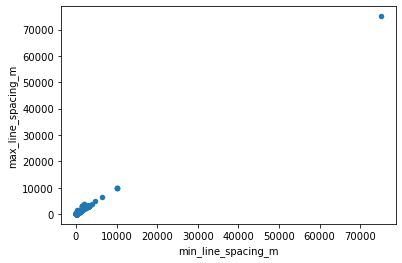

In [20]:
mag_surveys_line.plot.scatter('min_line_spacing_m','max_line_spacing_m')

It does appear that some have different values from survey combinations, etc

In [21]:
mag_surveys_line.sort_values(by='min_line_spacing_m', inplace=True)

<ipython-input-21-3ed1b95d87f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mag_surveys_line.sort_values(by='min_line_spacing_m', inplace=True)


In [24]:
#which we see here
mag_surveys_line.head(10)

,FID,datasetno,survey_eno,constituent_surveys,survey_id,survey_name,measure_type,measure_subtype,dataset_type,national_dataset,archive_file_description,archive_file_format,datum_levelling,archive_location,archive_type,file_size,country,state,onshore_offshore,survey_type,survey_detail,owner,operator,contractor,processor,client,platform_type,platform_name,survey_start_date,survey_end_date,crs_datum,min_longitude_wgs84,max_longitude_wgs84,min_latitude_wgs84,max_latitude_wgs84,min_line_spacing_m,max_line_spacing_m,tie_spacing_m,line_km,tie_km,total_km,line_azimuth,tie_azimuth,area_km2,flight_height_asl,flight_height_agl,mag_instrument,mag_sample_interval,rad_instrument,rad_sample_interval,rad_crystal_volume_down,rad_crystal_volume_up,grav_stations,min_station_spacing_m,max_station_spacing_m,grav_layout,grav_instrument,grav_reliability,em_system,legislation,survey_comments,cell_size_degrees,cell_size_m,dataset_release_date,licence,wms,wcs,ncss,opendap,file_download,doi,ecat_id,ecat_pid,ecat_uuid,dataset_qa_status,geometry
2216,geophysical_survey_datasets.17620,17620,606678,NaN,1292,Isa Region Airborne Magnetic Radiometric and D...,magnetic,magnetic line data,line,N,"GSQ Isa Region Cloncurry, 2017 (P1292), magnet...",NetCDF (.nc),NaN,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,712604 KB,AUS,QLD,onshore,air,NaN,Geological Survey of Queensland (GSQ),NaN,GPX Surveys Pty Ltd,GPX Surveys Pty Ltd,Geological Survey of Queensland (GSQ),fixed wing aircraft,Cessna 210L Centurion VH-IBY,2017-07-10,2018-04-30,EPSG:4283,140.2277,141.0320,-22.0038,-20.5766,50.0,100.0,NaN,103119.0,10268.0,113387.0,90.0,0.0,10475.0,NaN,50.0,unknown,0.1 second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Survey has two blocks - Mary Kathleen and the ...,NaN,NaN,2020-09-01,CC BY 4.0 © Geological Survey of Queensland,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/thredds/fileServer/i...,NaN,143465.0,http://pid.geoscience.gov.au/dataset/ga/143465,f918881c-c0b5-483e-a7c0-ab54030e4cdf,U,"POLYGON ((-20.589944 140.227436, -20.578376 14..."
2217,geophysical_survey_datasets.17621,17621,606678,NaN,1292,Isa Region Airborne Magnetic Radiometric and D...,magnetic,magnetic line data,line,N,"GSQ Isa Region Mary Kathleen, 2017 (P1292), ma...",NetCDF (.nc),NaN,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,27768 KB,AUS,QLD,onshore,air,NaN,Geological Survey of Queensland (GSQ),NaN,GPX Surveys Pty Ltd,GPX Surveys Pty Ltd,Geological Survey of Queensland (GSQ),fixed wing aircraft,Cessna 210L Centurion VH-IBY,2017-07-10,2018-04-30,EPSG:4283,139.9489,140.1129,-20.8583,-20.6596,50.0,100.0,NaN,103119.0,10268.0,113387.0,90.0,0.0,10475.0,NaN,50.0,unknown,0.1 second,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Survey has two blocks - Mary Kathleen and the ...,NaN,NaN,2020-09-01,CC BY 4.0 © Geological Survey of Queensland,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/thredds/fileServer/i...,NaN,143464.0,http://pid.geoscience.gov.au/dataset/ga/143464,beee7c49-a3a4-4dbb-8102-592ed9d49130,U,"POLYGON ((-20.840585 139.948408, -20.661139 13..."
1736,geophysical_survey_datasets.16961,16961,361288,NaN,1103,"Tennant Creek, NT, DME Test, 1996",magnetic,magnetic line data,line,N,"Tennant Creek, NT, DME Test, 1996 (P1103), mag...",NetCDF (.nc),AWAGS_MAG_2010,/g/data/iv65/Geoscience_Australia_Geophysics_R...,ANU NCI file repository,3388 KB,AUS,NT,onshore,air,detailed,Northern Territory of Australia (Northern Terr...,Northern Territory of Australia (Northern Terr...,NaN,NaN,NaN,NaN,NaN,1996-06-01,1996-12-31,EPSG:4283,134.2743,134.3641,-19.6248,-19.5650,50.0,50.0,NaN,1213.0,122.0,1335.0,0.0,90.0,NaN,NaN,50.0,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01,CC BY 4.0 © Commonwealth of Australia (Geoscie...,NaN,NaN,NaN,NaN,http://dapds00.nci.org.au/thredds/fileServer/i...,NaN,143192.0,http://pid.geoscience.gov.au/dataset/ga/143192,c447ba68-be21-4109-8329-b9c3cbc4e4a4,U,"POLYGON ((-19.618996 134.274031, -19.566896 13..."
3609

So we will use the max line spacing as an indicator

Next, we need to turn this text dataset into a geospatial dataset